In [6]:
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import seaborn as sns

plt.rcParams['figure.figsize'] = (13, 5)
plotting.BACKEND = 'matplotlib'

In [32]:
# PART 1: GRAPHS STUFF
G1 = graphs.BarabasiAlbert(N = 100)

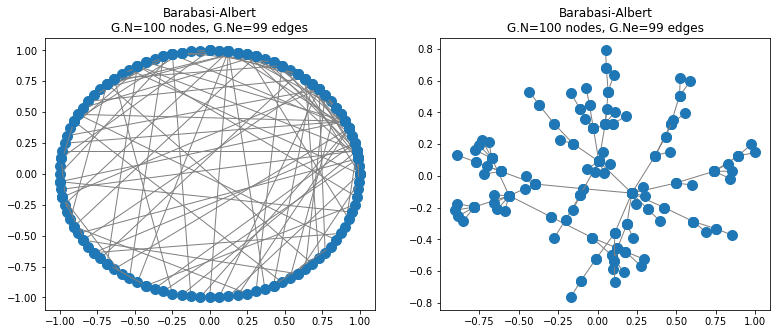

In [35]:
fig, axes = plt.subplots(1, 2)

G1.set_coordinates('ring2D')
G1.plot(ax=axes[0])

G1.set_coordinates('spring')
G1.plot(ax=axes[1])

In [17]:
G2 = graphs.Minnesota()

In [18]:
G2.coords.shape

(2642, 2)

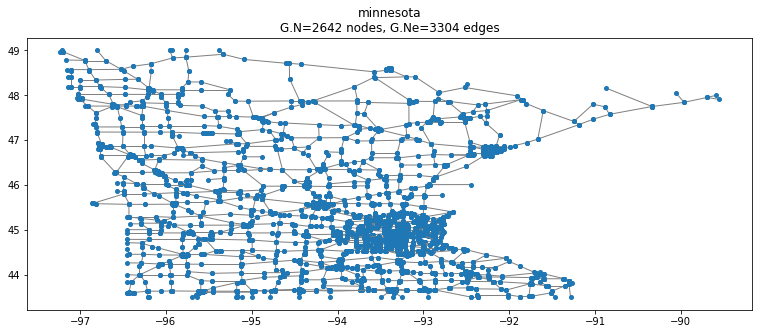

In [19]:
G2.plot()

In [108]:
print('{} nodes, {} edges'.format(G2.N, G2.Ne))
print('Connected: {}'.format(G2.is_connected()))
print('Directed: {}'.format(G2.is_directed()))

2642 nodes, 3304 edges
Connected: True
Directed: False


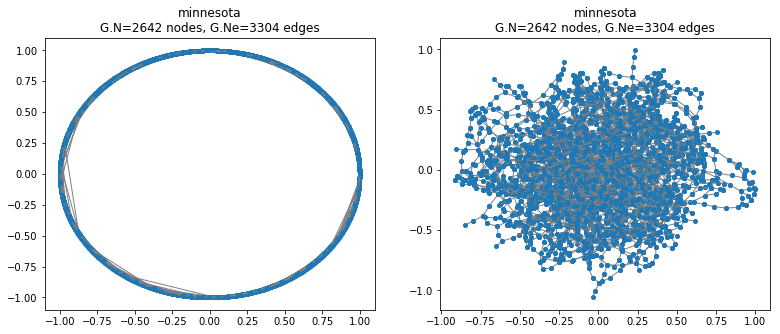

In [23]:
# Check the layout
fig, axes = plt.subplots(1, 2)
G2.set_coordinates('ring2D')
G2.plot(ax=axes[0])

G2.set_coordinates('spring')
G2.plot(ax=axes[1])

In [78]:
communities = [100, 120, 150]
G3 = graphs.Community(N=370, Nc=3, comm_sizes=communities, seed=1)

2018-10-28 19:01:18,653:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 3.1012404019739703


In [38]:
print(np.unique(G3.W.toarray()))
# the sparsity pattern of its adjacency matrix G.W and
# its node-link diagram.

[0 1]


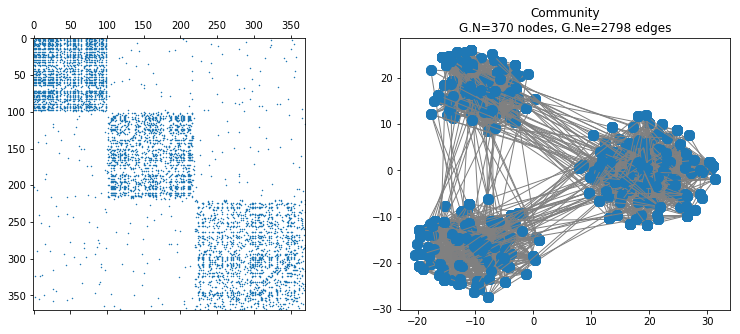

In [43]:
fig, axes = plt.subplots(1, 2)
axes[0].spy(G3.W, markersize=0.5)
G3.set_coordinates('community2D')
G3.plot(ax=axes[1])

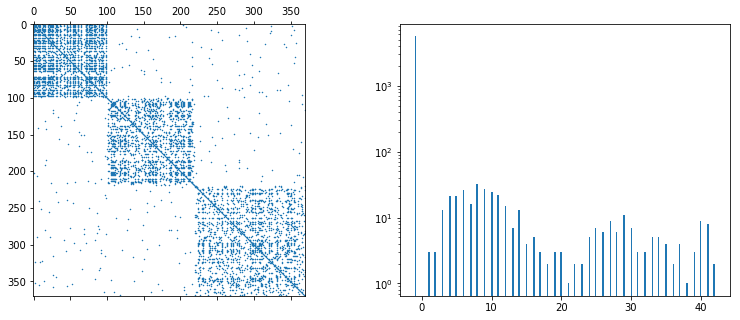

In [48]:
G3.compute_laplacian('combinatorial') # L = D - Adj
fig, axes = plt.subplots(1, 2)
axes[0].spy(G3.L, markersize=0.5)
axes[1].hist(G3.L.data, bins=200, log=True);

/Users/hq2nguye/anaconda3/lib/python3.6/site-packages/pygsp/graphs/graph.py:496: RuntimeWarning: divide by zero encountered in power
  d = np.power(self.dw, -0.5)


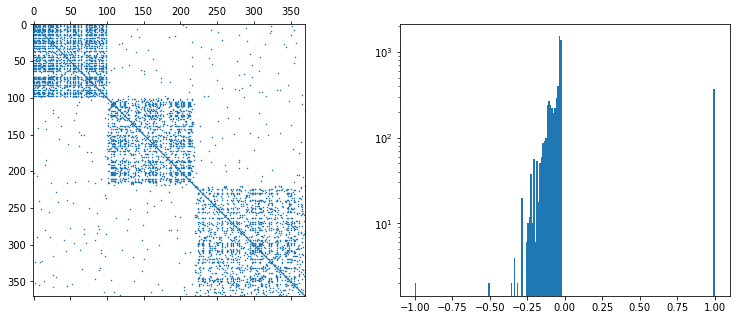

In [50]:
G3.compute_laplacian('normalized') # Normalized L: L=I− D^(−1/2)[dot]W[dot]D^(−1/2) 
fig, axes = plt.subplots(1, 2)
axes[0].spy(G3.L, markersize=0.5)
axes[1].hist(G3.L.data, bins=200, log=True);

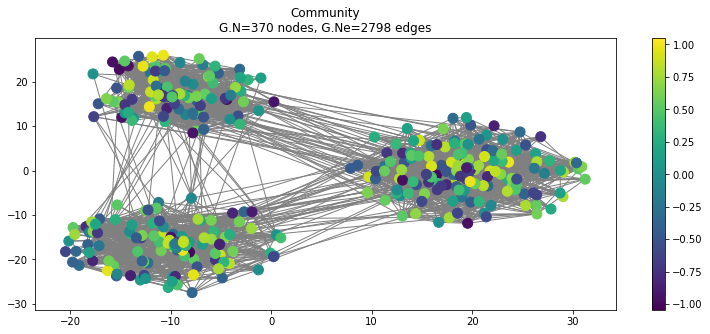

In [52]:
x = np.random.uniform(-1, 1, size=G3.N)
G3.plot_signal(x)

In [54]:
# Signal Smoothness
# Note: normalizing by the norm of the signal, so that its energy does not influence our computation.

# Verify signal smoothness by computing the norm of the gradients: x_T * L * x
x.T @ G3.L @ x / np.linalg.norm(x)**2

0.9707000706839434

In [57]:
x.T[:10]

array([-0.51672849, -0.39929299,  0.54924695, -0.33252064,  0.31087619,
       -0.16277596, -0.41273842,  0.26285456, -0.2753002 ,  0.66783096])

In [58]:
G3.L

<370x370 sparse matrix of type '<class 'numpy.float64'>'
	with 5966 stored elements in Compressed Sparse Row format>

In [59]:
G3.N # num of nodes

370

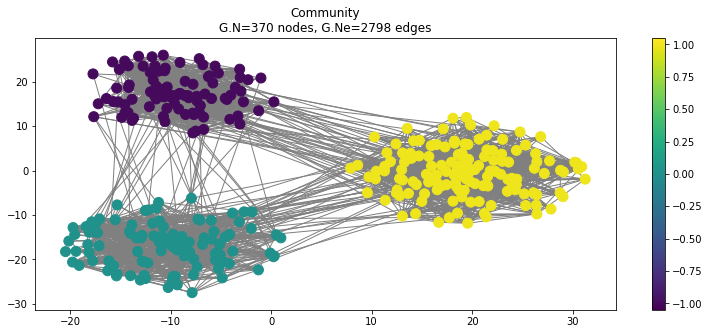

In [60]:
x = np.zeros(G3.N)
x[:communities[0]] = -1 * np.ones(communities[0]) # if x_i = -1 then i is in community 1
x[-communities[-1]:] = 1 * np.ones(communities[-1])
G3.plot_signal(x)

In [106]:
G3.U[:, 4][:5]

array([ 0.0076112 ,  0.00362587,  0.00495502,  0.00450764, -0.00678732])

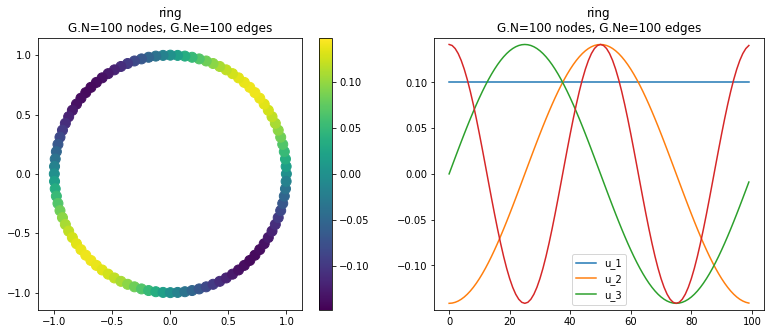

In [67]:
# FOURIER BASIS: (O(n^3))
G3 = graphs.Ring(N=100)
G3.compute_fourier_basis()
fig, axes = plt.subplots(1, 2)
G3.plot_signal(G3.U[:, 4], ax=axes[0])

G3.set_coordinates('line1D')
G3.plot_signal(G3.U[:, 0:4], ax=axes[1])
axes[1].legend(['u_{}'.format(i) for i in range(1, 4)])
#Fourier basis of a ring graph is equivalent to the classical Fourier modes

In [69]:
# Eigenvalues are a measure of smoothness, or frequency, of the eigenvectors.
def print_eigenvalue(n):
    u = G3.U[:, n]
    print('u_{0}^T L u_{0} = {1:.4f} (eigenvalue {2:.4f})'.format(n, u.T @ G3.L @ u, G3.e[n]))

for n in range(6):
    print_eigenvalue(n)

u_0^T L u_0 = 0.0000 (eigenvalue 0.0000)
u_1^T L u_1 = 0.0039 (eigenvalue 0.0039)
u_2^T L u_2 = 0.0039 (eigenvalue 0.0039)
u_3^T L u_3 = 0.0158 (eigenvalue 0.0158)
u_4^T L u_4 = 0.0158 (eigenvalue 0.0158)
u_5^T L u_5 = 0.0354 (eigenvalue 0.0354)


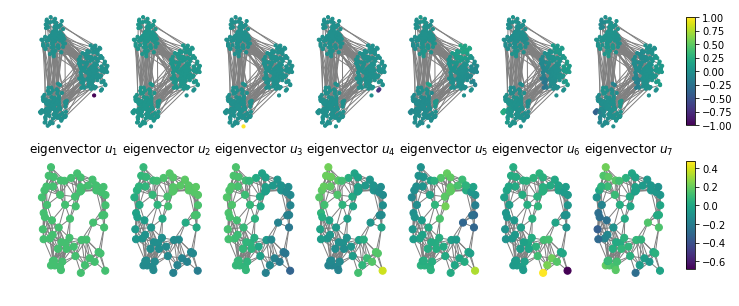

In [130]:
# Plot Fourier modes:
# The eigenvectors can be localized on non-regularly sampled graphs.
fig, axes = plt.subplots(2, 7)

# G = graphs.Grid2d(10, 10)
G3.compute_fourier_basis()
limits = [f(G3.U[:, :len(axes[0, :])]) for f in (np.min, np.max)]
for i, ax in enumerate(axes[0, :]):
    G3.plot_signal(G3.U[:, i], limits=limits, colorbar=False, vertex_size=10, ax=ax)
    ax.set_title('')
    ax.set_axis_off()
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.82, 0.56, 0.01, 0.3])
fig.colorbar(ax.collections[0], cax=cax)

G4 = graphs.Sensor(seed=42)
G4.compute_fourier_basis()
limits = [f(G4.U[:, :len(axes[1, :])]) for f in (np.min, np.max)]
for i, ax in enumerate(axes[1, :]):
    G4.plot_signal(G4.U[:, i], limits=limits, colorbar=False, vertex_size=50, ax=ax)
    ax.set_title('eigenvector $u_{}$'.format(i+1))
    ax.set_axis_off()
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.82, 0.16, 0.01, 0.3])
fig.colorbar(ax.collections[0], cax=cax);


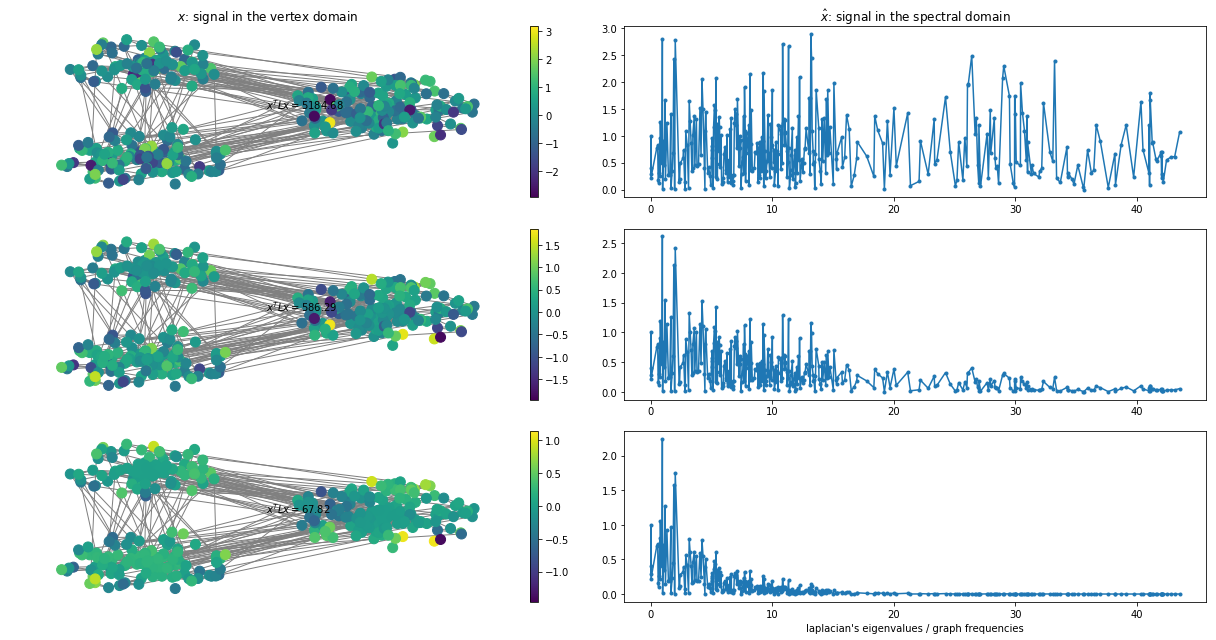

In [86]:
# FOURIER TRANSFORM OF SIGNAL X
# The intuition about the smoothness of a signal 
# and its representation in the spectral domain again transfers from classical Fourier analysis. 
G3.compute_fourier_basis()
taus = [0, 3, 10]
fig, axes = plt.subplots(len(taus), 2, figsize=(17, 9))

x0 = np.random.RandomState(1).normal(size=G3.N) # random state generate from random distributions
for i, tau in enumerate(taus):
    g = filters.Heat(G3, tau) 
    """ 
    HEAT: An application of this filter to a signal simulates heat diffusion.
    Parameters
    ----------
    G : graph
    tau : int or list of ints
        Scaling parameter. If a list, creates a filter bank with one filter per
        value of tau.
    normalize : bool
        Normalizes the kernel. Needs the eigenvalues.
    """
    x = g.filter(x0).squeeze()
    x_hat = G3.gft(x).squeeze()
    
    G3.plot_signal(x, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
    axes[i, 0].text(5, 0.5, '$x^T L x = {:.2f}$'.format(x.T @ G3.L @ x))
    
    axes[i, 1].plot(G3.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")
plt.tight_layout()

In [85]:
len(x0)

370

Text(0.5,0,"laplacian's eigenvalues / graph frequencies")

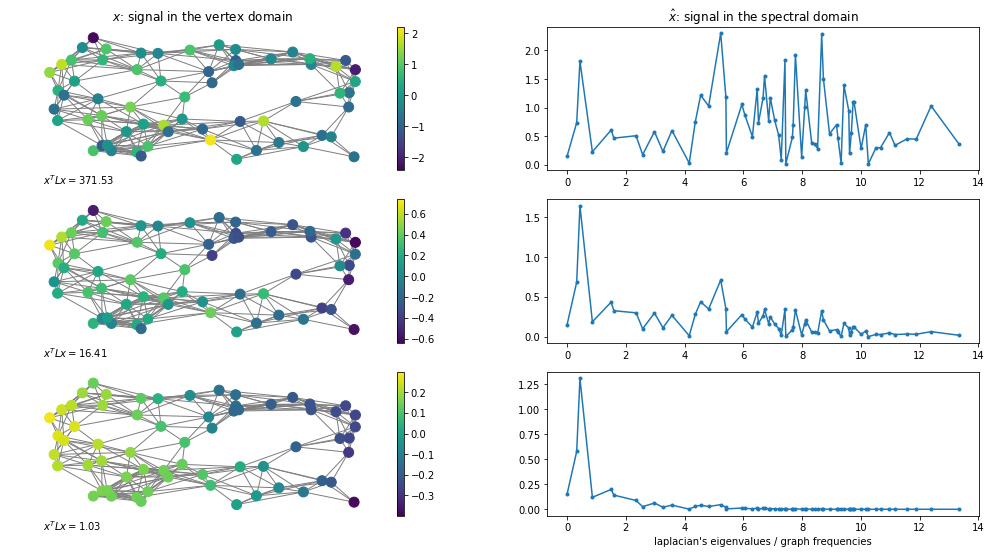

In [76]:
# FOURIER TRANSFORM OF SIGNAL X
# The intuition about the smoothness of a signal 
# and its representation in the spectral domain again transfers from classical Fourier analysis. 
G = graphs.Sensor(seed=42)
G.compute_fourier_basis()

# Before tackling wavelets, we can see the effect of one filter localized on the graph. So we can first design a few heat
# kernel filters
taus = [0, 3, 10]
fig, axes = plt.subplots(len(taus), 2, figsize=(17, 9))

x0 = np.random.RandomState(1).normal(size=G.N)
for i, tau in enumerate(taus):
    g = filters.Heat(G, tau)
    x = g.filter(x0).squeeze()
    x_hat = G.gft(x).squeeze()
    
    G.plot_signal(x, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
    axes[i, 0].text(0, -0.2, '$x^T L x = {:.2f}$'.format(x.T @ G.L @ x))
    
    axes[i, 1].plot(G.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")


In [94]:
G = graphs.Bunny()
G.compute_fourier_basis()
taus = [1, 10, 25, 50]
Hk = filters.Heat(G, taus, normalize=False)
S = np.zeros(G.N)
vertex_delta = 83
S[vertex_delta] = 1
Sf_vec = Hk.analyze(S)
Sf = Sf_vec.reshape((Sf_vec.size//len(taus), len(taus)), order='F')

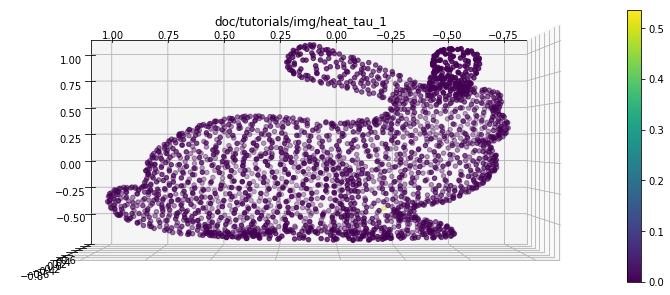

In [100]:
plotting.plot_signal(G, Sf[:,0], vertex_size=20, plot_name='doc/tutorials/img/heat_tau_1')

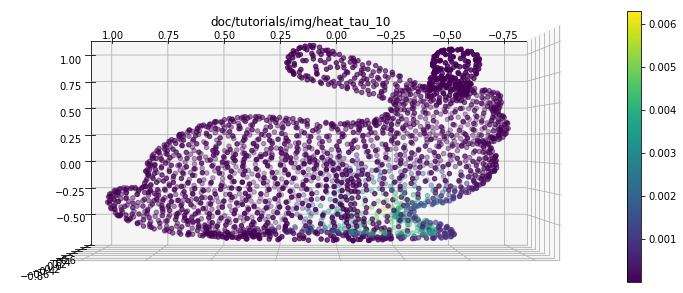

In [103]:
plotting.plot_signal(G, Sf[:,1], vertex_size=20, plot_name='doc/tutorials/img/heat_tau_10')

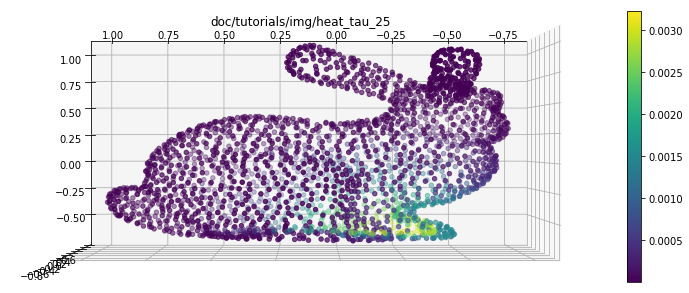

In [104]:
plotting.plot_signal(G, Sf[:,2], vertex_size=20, plot_name='doc/tutorials/img/heat_tau_25')

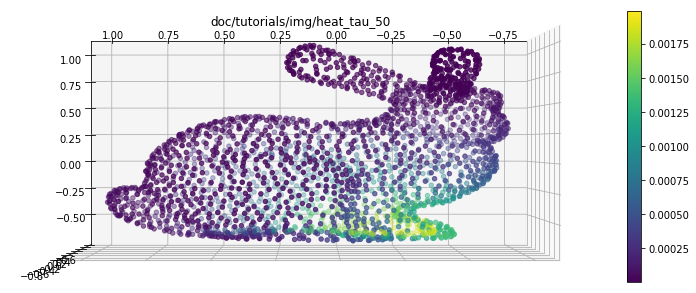

In [105]:
plotting.plot_signal(G, Sf[:,3], vertex_size=20, plot_name='doc/tutorials/img/heat_tau_50')

In [123]:
####### 
communities = [100, 120, 150, 30]
G = graphs.Community(N=400, Nc=4, comm_sizes=communities, seed=1)
print('{} nodes, {} edges'.format(G.N, G.Ne))
print('Connected: {}'.format(G.is_connected()))
print('Directed: {}'.format(G.is_directed()))

2018-10-28 20:16:45,328:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 3.1622776601683795


400 nodes, 3059 edges
Connected: False
Directed: False


In [109]:
print(np.unique(G3.W.toarray())) # Adj matrix

[0 1]


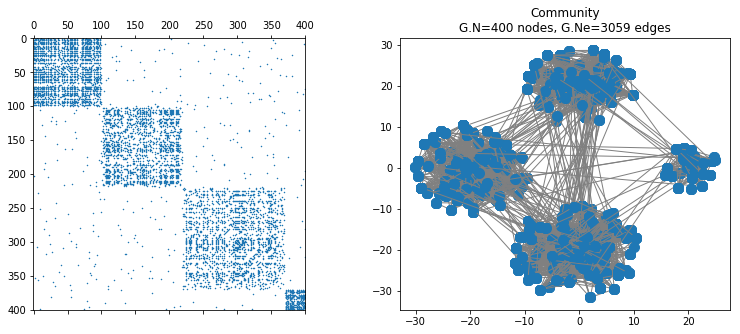

In [110]:
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.W, markersize=0.5)
G.set_coordinates('community2D')
G.plot(ax=axes[1])

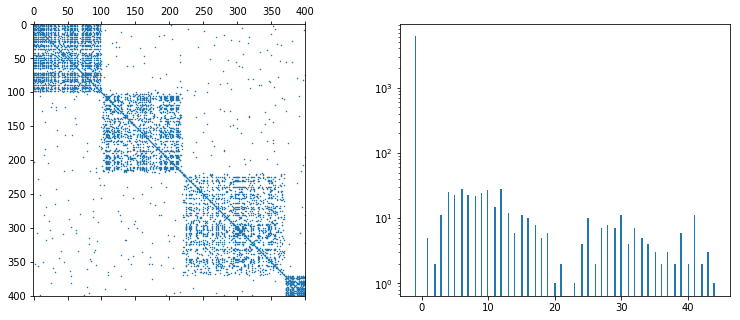

In [112]:
G.compute_laplacian('combinatorial') # L = D - Adj
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=0.5)
axes[1].hist(G.L.data, bins=200, log=True)

/Users/hq2nguye/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.01136364, 0.        , 0.        , 0.        , 0.05681818,
        0.        , 0.        , 0.        , 0.        , 0.02272727,
        0.        , 0.        , 0.        , 0.125     , 0.        ,
        0.        , 0.        , 0.        , 0.28409091, 0.        ,
        0.        , 0.        , 0.26136364, 0.        , 0.        ,
        0.        , 0.        , 0.31818182, 0.        , 0.        ,
        0.        , 0.26136364, 0.        , 0.        , 0.        ,
        0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.27272727, 0.        , 0.        , 0.        , 0.        ,
        0.30681818, 0.        , 0.        , 0.        , 0.        ,
        0.17045455, 0.        , 0.        , 0.        , 0.31818182,
        0.        , 0.        , 0.        , 0.        , 0.13636364,
        0.        , 0.        , 0.        , 0.06818182, 0.        ,
        0.        , 0.        , 0.        , 0.125     , 0.        ,
        0.        , 0.        , 0.11363636, 0.  

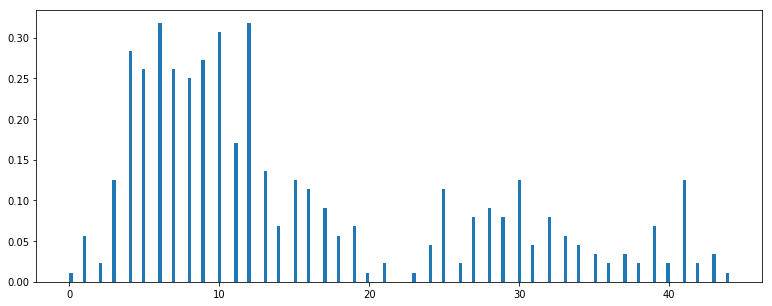

In [116]:
plt.hist(G.d, bins= 200, normed= True) # degree matrix

/Users/hq2nguye/anaconda3/lib/python3.6/site-packages/pygsp/graphs/graph.py:496: RuntimeWarning: divide by zero encountered in power
  d = np.power(self.dw, -0.5)


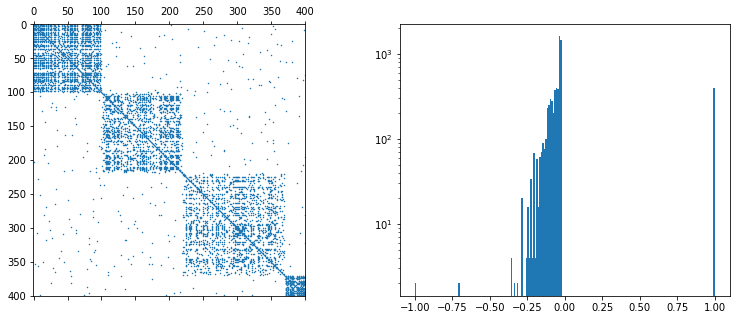

In [115]:
G.compute_laplacian('normalized') # Normalized L: L=I− D^(−1/2)[dot]W[dot]D^(−1/2) 
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=0.5)
axes[1].hist(G.L.data, bins=200, log=True);

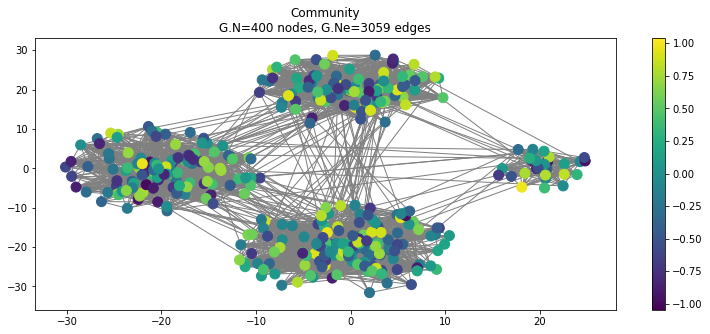

In [117]:
x = np.random.uniform(-1, 1, size=G.N)
G.plot_signal(x)

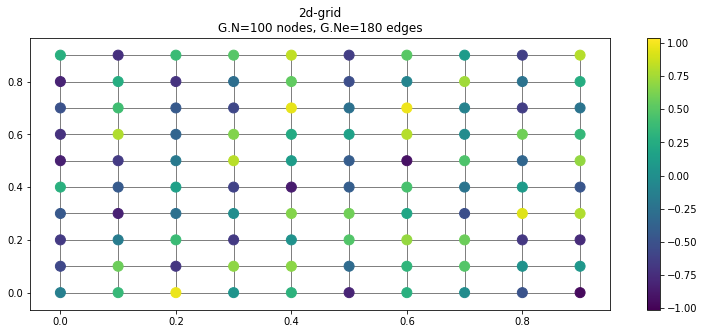

In [132]:
G0 = graphs.Grid2d(10, 10)
x0 = np.random.uniform(-1, 1, size=G0.N)
G0.plot_signal(x0)

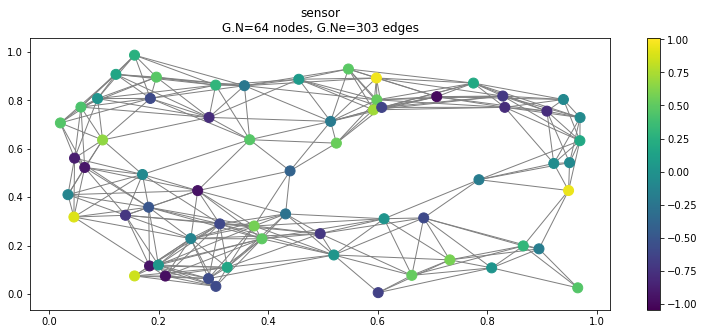

In [133]:
G4 = graphs.Sensor(seed=42)
x4 = np.random.uniform(-1, 1, size=G4.N)
G4.plot_signal(x4)

/Users/hq2nguye/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


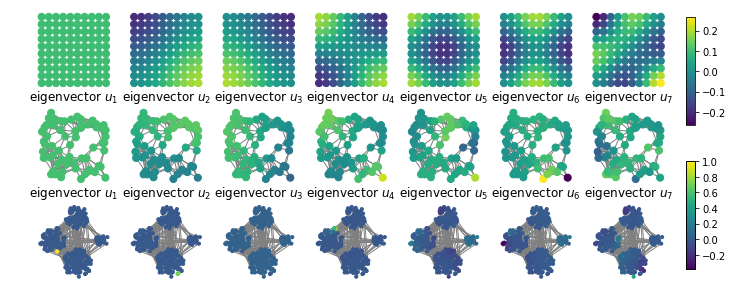

In [129]:
# Plot Fourier modes:
# The eigenvectors can be localized on non-regularly sampled graphs.
fig, axes = plt.subplots(3, 7)

G0 = graphs.Grid2d(10, 10)
G0.compute_fourier_basis()
limits = [f(G0.U[:, :len(axes[0, :])]) for f in (np.min, np.max)]
for i, ax in enumerate(axes[0, :]):
    G0.plot_signal(G0.U[:, i], limits=limits, colorbar=False, vertex_size=50, ax=ax)
    ax.set_title('')
    ax.set_axis_off()
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.82, 0.56, 0.01, 0.3])
fig.colorbar(ax.collections[0], cax=cax)

G4 = graphs.Sensor(seed=42)
G4.compute_fourier_basis()
limits = [f(G4.U[:, :len(axes[1, :])]) for f in (np.min, np.max)]
for i, ax in enumerate(axes[1, :]):
    G4.plot_signal(G4.U[:, i], limits=limits, colorbar=False, vertex_size=50, ax=ax)
    ax.set_title('eigenvector $u_{}$'.format(i+1))
    ax.set_axis_off()
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.82, 0.16, 0.01, 0.3])
fig.colorbar(ax.collections[0], cax=cax);

G.compute_fourier_basis()
limits = [f(G.U[:, :len(axes[2, :])]) for f in (np.min, np.max)]
for i, ax in enumerate(axes[2, :]):
    G.plot_signal(G.U[:, i], limits=limits, colorbar=False, vertex_size=10, ax=ax)
    ax.set_title('eigenvector $u_{}$'.format(i+1))
    ax.set_axis_off()
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.82, 0.16, 0.01, 0.3])
fig.colorbar(ax.collections[0], cax=cax);


Text(0.5,0,"laplacian's eigenvalues / graph frequencies")

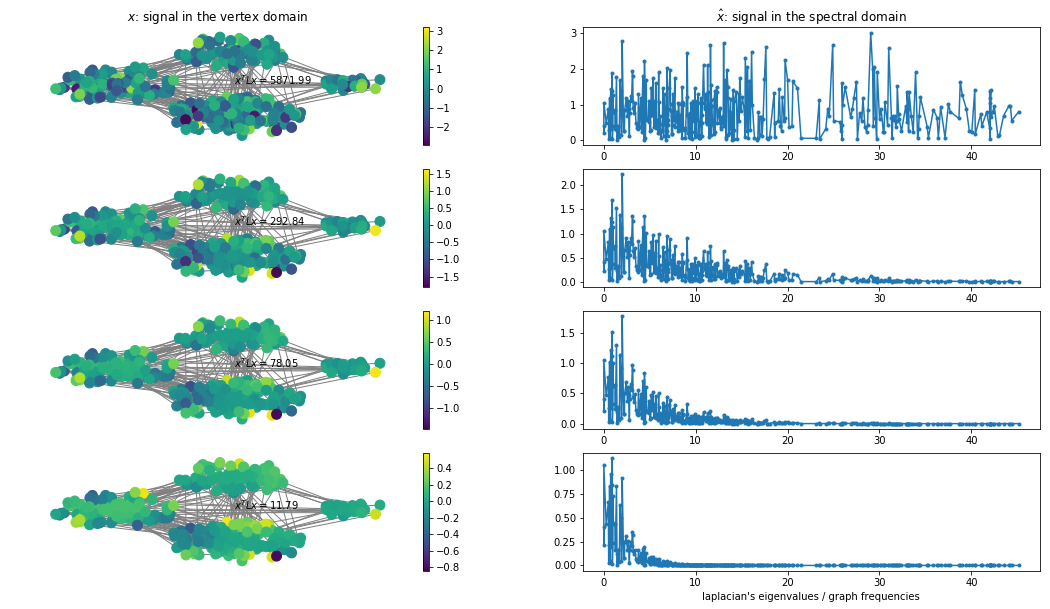

In [128]:
G.compute_fourier_basis()
taus = [0, 5, 10, 25]
fig, axes = plt.subplots(len(taus), 2, figsize=(18, 10))

x0 = np.random.RandomState(1).normal(size=G.N) # random state generate from random distributions
for i, tau in enumerate(taus):
    g = filters.Heat(G, tau) 
    """ 
    HEAT: An application of this filter to a signal simulates heat diffusion.
    Parameters
    ----------
    G : graph
    tau : int or list of ints
        Scaling parameter. If a list, creates a filter bank with one filter per
        value of tau.
    normalize : bool
        Normalizes the kernel. Needs the eigenvalues.
    """
    x = g.filter(x0).squeeze()
    x_hat = G.gft(x).squeeze()
    
    G.plot_signal(x, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
    axes[i, 0].text(0, -0.5, '$x^T L x = {:.2f}$'.format(x.T @ G.L @ x))
    
    axes[i, 1].plot(G.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")